Preguntas a responder:
-Cuantos juegos se crean de media?
-Cuantos compradores hay?
-Por que antes hay mas compradores de juegos?
-Que es lo que hace un juego sea bueno?


In [159]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
#Importar el data set
data = pd.read_csv('./bgg_dataset.csv', sep=';')

In [160]:
#Para ver el tipo de data con el que se va trabajar
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.2+ MB


In [161]:
#Para saber el primer juego que se creo y el ultimo de esta base de datos
(data[['Year Published', 'Name']].loc[data['Year Published'] == max(data['Year Published'])])
#Dato curioso:
#Se trata de uno de los juegos de mesa más antiguos, el objetivo del senet es sacar tus piezas del tablero antes que el adversario, siguiendo una serie de reglas
oldest_g =(data[['Year Published', 'Name']].loc[data['Year Published'] == min(data['Year Published'])])
oldest_g

,Year Published,Name
8174,-3500.0,Senet


In [162]:
juegos_Unicos = data[['Year Published', 'Name']]
juegos_Unicos.sort_values(by='Year Published', ascending=False)

,Year Published,Name
8978,2022.0,The 7th Citadel
9487,2021.0,Railroad Ink Challenge: Lush Green Edition
9268,2021.0,Zombicide (2nd Edition)
8756,2021.0,Jekyll vs. Hyde
7315,2021.0,Kōhaku
...,...,...
8924,-2600.0,The Royal Game of Ur
20219,-3000.0,Marbles
1275,-3000.0,Backgammon
8174,-3500.0,Senet


In [163]:
#Limpiar el codigo de todos los NA - Not aviable
data.columns[data.isnull().any()]



Index(['ID', 'Year Published', 'Owned Users', 'Mechanics', 'Domains'], dtype='object')

In [164]:
#Para la depuracion de Owners a la posibilidad de que no hayan registros debido a la antiguedad
data = data[data["Owned Users"].notna()]

In [165]:
data.columns[data.isnull().any()]
#conb la depuracion de owner se consiguio que su id y year tambien se depuran

Index(['Mechanics', 'Domains'], dtype='object')

In [166]:
#Revisando domaibns y mechanics decido remplazarlo por que 'no hay' o 'Simple'
data['Domains']   = data.Domains.fillna('Simple')#Tipo de juego
data['Mechanics'] = data.Mechanics.fillna('No hay')#Estilo de juego

In [167]:
#A la vista de year published depurare para que no haya decimal
data['Year Published'] =  data['Year Published'].astype(int)



In [168]:
#Quiero los juegos de los ultimos 50 anos para tener mas certeza
data_ord = data[data['Year Published'] >= 1968].sort_values(by='Year Published', ascending=False)
data_ord

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
8978,286063.0,The 7th Citadel,2022,1,4,1000,14,44,"8,27",8980,2,383.0,"Cooperative Game, Grid Movement, Hand Manageme...",Simple
1434,290236.0,Canvas,2021,1,5,30,14,953,"7,81",1435,"1,65",3230.0,"Card Drafting, Hand Management, Increase Value...",Family Games
7528,277700.0,Merchants Cove,2021,1,4,75,14,72,"7,91",7530,"2,88",241.0,"Commodity Speculation, Dice Rolling, Rondel, T...",Simple
5629,256707.0,Trick Shot,2021,2,4,60,12,121,"8,32",5631,"2,50",370.0,"Card Drafting, Dice Rolling, Grid Movement, Ha...",Simple
7641,302098.0,Chronicles of Crime: 1900,2021,1,4,90,14,57,"8,27",7643,0,2711.0,"Cooperative Game, Scenario / Mission / Campaig...",Simple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20285,4888.0,Don't Break the Ice,1968,2,4,20,3,1119,"4,74",20287,"1,10",1522.0,Physical Removal,Children's Games
16029,13495.0,High Finance,1968,2,6,45,12,54,"5,70",16031,"1,60",105.0,"Card Drafting, Roll / Spin and Move, Stock Hol...",Simple
10480,17691.0,Djambi,1968,3,4,60,0,59,"7,01",10482,"3,33",79.0,No hay,Abstract Games
6958,4934.0,Battling Tops,1968,2,4,45,6,357,"6,08",6960,"1,21",390.0,No hay,"Children's Games, Family Games"


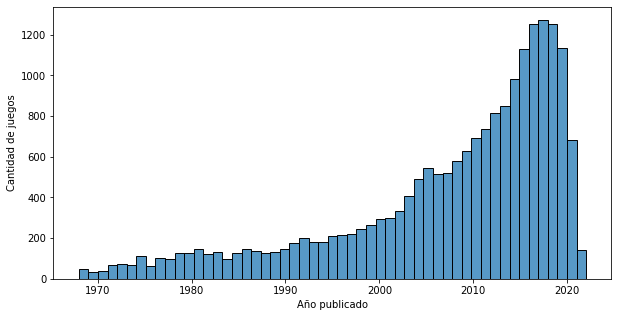

In [169]:
#Se puede observar que desde al rededor de 1990 empieza a crecer la industria
plt.figure(figsize=(10,5))
sns.histplot(data_ord['Year Published'])
plt.ylabel("Cantidad de juegos")
plt.xlabel('Año publicado');

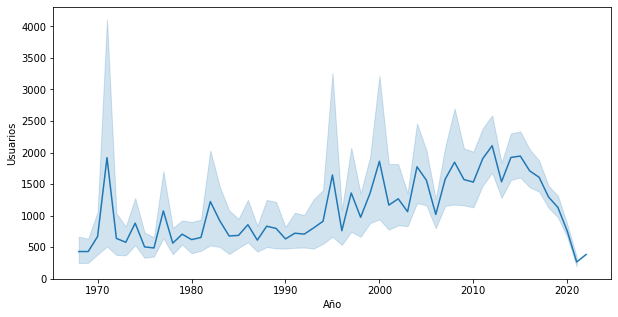

In [181]:
plt.figure(figsize=(10,5))
sns.lineplot(x=data_ord['Year Published'],y=data_ord['Owned Users'])
plt.xlabel("Año")
plt.ylabel("Usuarios");

In [ ]:
#He dividir los tipos juegos para poder saber con mas precision cuantos usuarios tiene cada juego
#para ello limpira los datos separando los cada uno
def arreglar(data):
    values=[]
    for i in data:
        i = i.replace(",",".")
        values.append(i)
    return values

data_ord['Rating Average']=  pd.to_numeric(arreglar(data_ord['Rating Average']))

#una vez eliminado los simbolos especiales 
#los separamos
def sep(df):
    corpus= []
    for i in df:
        item = i.split(",")
        corpus += item
    return corpus

def sepe(df):
    vals=[]
    for i in df:
        m = i.lstrip()
        vals.append(m)
    return vals




In [ ]:
gg = data_ord
gg = gg.loc[gg['Rating Average'] > 8]
fig = px.scatter(gg, x="Year Published", y="Rating Average", color="Domains")
fig.show()

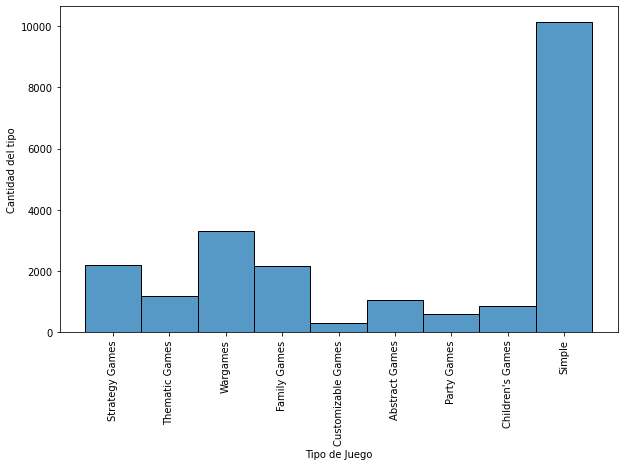

In [194]:
tipo = sepe(sep(data["Domains"]))
tipo = pd.DataFrame(tipo,columns=['Domains'])


fig,ax = plt.subplots(figsize=(10,6))

sns.histplot(x="Domains",data=tipo, binwidth=10,discrete=True)
plt.xticks(rotation= 90)
plt.xlabel("Tipo de Juego")
plt.ylabel("Cantidad del tipo");


c:\Users\Zino\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



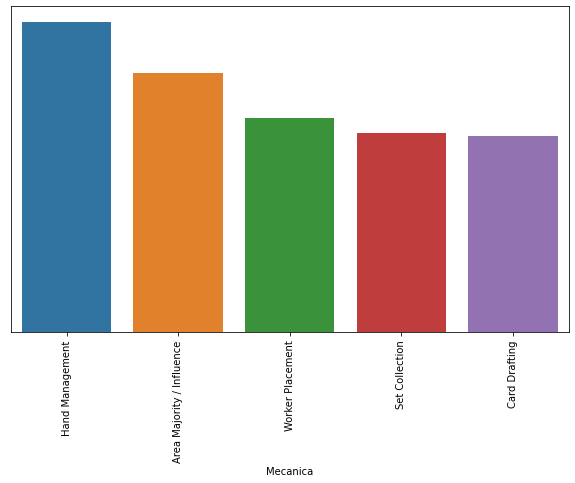

In [ ]:
#Con esta grafica podemos entender que de la familia de strategia las mecanicas mas interesantes son estas viendo que superior a 300 usuarios les gusta esa mecanica
strat = data[data['Domains'] == 'Strategy Games']
strat = sepe(sep(strat["Mechanics"]))
strat = pd.DataFrame(strat,columns=['Mechanics'])
dups_macanics = strat.pivot_table(columns=["Mechanics"], aggfunc='size')
dups_macanics= pd.DataFrame(dups_macanics,columns=['Amount']).sort_values(by='Amount',ascending=False).reset_index()
dups_macanics = dups_macanics[dups_macanics.Amount > 300]
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot("Mechanics","Amount", data=dups_macanics)
plt.xticks(rotation= 90)
plt.xlabel("Mecanica")
ax.axes.get_yaxis().set_visible(False);


c:\Users\Zino\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



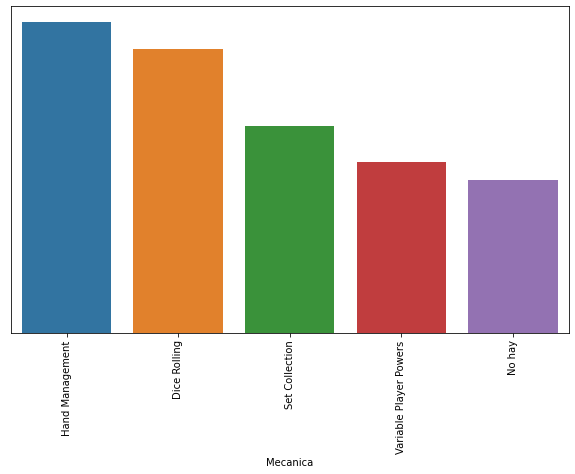

In [ ]:
simple = data[data['Domains'] == 'Simple']
simple = sepe(sep(simple["Mechanics"]))
simple = pd.DataFrame(simple,columns=['Mechanics'])
dups_simple = simple.pivot_table(columns=["Mechanics"], aggfunc='size')
dups_simple= pd.DataFrame(dups_simple,columns=['Amount']).sort_values(by='Amount',ascending=False).reset_index()
dups_simple = dups_simple[dups_simple.Amount > 1000]
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot("Mechanics","Amount", data=dups_simple)
plt.xticks(rotation= 90)
plt.xlabel("Mecanica")
ax.axes.get_yaxis().set_visible(False);

c:\Users\Zino\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



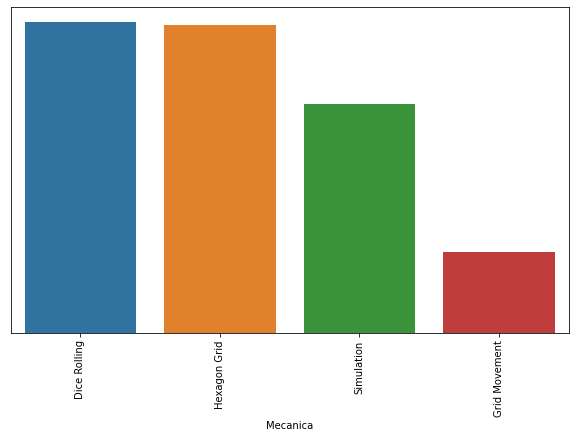

In [ ]:
wargames = data[data['Domains'] == 'Wargames']
wargames = sepe(sep(wargames["Mechanics"]))
wargames = pd.DataFrame(wargames,columns=['Mechanics'])
dups_wargames = wargames.pivot_table(columns=["Mechanics"], aggfunc='size')
dups_wargames= pd.DataFrame(dups_wargames,columns=['Amount']).sort_values(by='Amount',ascending=False).reset_index()
dups_wargames = dups_wargames[dups_wargames.Amount > 500]
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot("Mechanics","Amount", data=dups_wargames)
plt.xticks(rotation= 90)
plt.xlabel("Mecanica")
ax.axes.get_yaxis().set_visible(False);

In [ ]:
#Con esto datos podemos en tender que los juegos de mesa en la ultima decada a tenido una caida, y las mas rentables han sido los juegos de mesa

In [ ]:
#Haciendo una investigacion un poco superficial vemos que mediante la epoca avanza los juegos de mesa empiezan a ser un poco obsoletas
#con la lleagda de los videojuegos, juntando eso con las compras online y la aparicion de la pandemia podremos deducir su decaida